In [1]:
import pandas as pd
import numpy as np 
import quandl
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

from dotenv import load_dotenv
load_dotenv('my_keys.env')
from pathlib import Path

%matplotlib inline

In [2]:
# Read in Data 
btc_path = Path('BCHAIN-MKPRU.csv')
btc_df = pd.read_csv(btc_path,infer_datetime_format=True, parse_dates=True)
btc_df = btc_df.iloc[::-1] # reverse df
btc_df = btc_df[btc_df['Value'] > 0]
#bchain_df.plot(logy=True, figsize=(15,10))
#bchain_df.plt.yscale('log')

In [3]:
btc_df.tail()

,Date,Value
4,2021-08-01,41659.06
3,2021-08-02,40000.46
2,2021-08-03,39193.94
1,2021-08-04,38138.00
0,2021-08-05,39750.14


In [4]:
# Logarithmic function
def func(x,p1,p2):
    return p1*np.log(x)+p2
# where x is the number of days since the start of the dataset 

In [5]:
# Regression fitting

xdata = np.array([x + 1 for x in range(len(btc_df))]) # sets x axis 
ydata = np.log(btc_df['Value']) # where y is the logarithm of btc's price at any given time
popt, pcov = curve_fit(func, xdata, ydata, p0=(2.0,-5)) # extracting optimal coefficients, p0 is initial guess which helps the algorithm optimize

fittedydata = func(xdata,popt[0],popt[1])
print(popt)
#fittedYdata = func(np.array([x for x in range(len(btc_df))]),popt[0],popt[1])

[  3.00299324 -15.84676688]


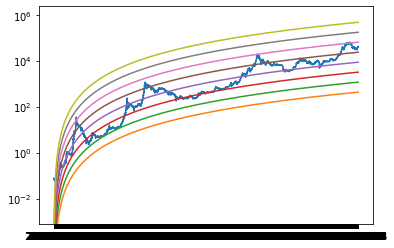

In [6]:
btc_reg_band = plt.semilogy(btc_df['Date'],btc_df['Value'])
for i in range(-3,5):
    plt.plot(btc_df['Date'], np.exp(fittedydata + i))# Exponentiate our date data because we are using the log of our btc value
btc_reg_band = plt.ylim(bottom=0.0008) # 0.0008 because this is btc's starting price from day one
plt.show()
